<h1 align="center"><font size="5"> Logistic Regression with Python</font></h1>

В этой записной книжке вы изучите логистическую регрессию, а затем создадите модель для телекоммуникационной компании, чтобы предсказать, когда ее клиенты уйдут к конкуренту, чтобы они могли предпринять действия для удержания клиентов.

<a id="ref1"></a>
## В чем разница между линейной и логистической регрессией?

Хотя линейная регрессия подходит для оценки непрерывных значений (например, оценки цены дома), она не является лучшим инструментом для прогнозирования класса наблюдаемой точки данных. Чтобы оценить класс точки данных, нам нужно какое-то руководство о том, какой класс <b> наиболее вероятен </b> для этой точки данных. Для этого мы используем <b> Логистическую регрессию </b>.

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<font size = 3><strong>Напомним, линейная регрессия:</strong></font>
<br>
<br>
    Как вы знаете, <b> Линейная регрессия </b> находит функцию, которая связывает непрерывную зависимую переменную <b> y </b> с некоторыми предикторами (независимыми переменными $ x_1 $, $ x_2 $ и т. д.). Например, простая линейная регрессия предполагает функцию вида:
<br><br>
$$
y = \theta_0 + \theta_1  x_1 + \theta_2  x_2 + \cdots
$$
<br>
и находит значения параметров  $\theta_0, \theta_1, \theta_2$ и т. д., где термин $\theta_0$ является "перехватом". Это может быть вообще показано как:
<br><br>
$$
ℎ_\theta(𝑥) = \theta^TX
$$
<p></p>

</div>

Логистическая регрессия - это вариант линейной регрессии, полезный, когда наблюдаемая зависимая переменная <b> y </b> является категориальной. Она создает формулу, которая предсказывает вероятность метки класса в зависимости от независимых переменных.

Логистическая регрессия соответствует специальной s-образной кривой, беря линейную регрессию и преобразовывая числовую оценку в вероятность со следующей функцией, которая называется сигмоидальной функцией 𝜎:

$$
ℎ_\theta(𝑥) = \sigma({\theta^TX}) =  \frac {e^{(\theta_0 + \theta_1  x_1 + \theta_2  x_2 +...)}}{1 + e^{(\theta_0 + \theta_1  x_1 + \theta_2  x_2 +\cdots)}}
$$
Or:
$$
ProbabilityOfaClass_1 =  P(Y=1|X) = \sigma({\theta^TX}) = \frac{e^{\theta^TX}}{1+e^{\theta^TX}} 
$$

В этом уравнении ${\theta^TX}$ - результат регрессии (сумма переменных, взвешенных по коэффициентам), `exp` - экспоненциальная функция, а $\sigma(\theta^TX)$ - сигмоид или [логистическая функция] (http://en.wikipedia.org/wiki/Logistic_function), также называемая логистической кривой. Это обычная «S» образная сигмовидная кривая.

Итак, вкратце, логистическая регрессия пропускает входные данные через логистику/сигмоид, но затем обрабатывает результат как вероятность:

<img
src="https://ibm.box.com/shared/static/kgv9alcghmjcv97op4d6onkyxevk23b1.png" width="400" align="center">

Цель алгоритма __логистической регресси__ состоит в том, чтобы найти наилучшие параметры θ для $ℎ_\theta(𝑥)$ = $\sigma({\theta^TX})$ таким образом, чтобы модель лучше всего предсказывала класс каждого случая.

### Отток клиентов с логистической регрессией
Телекоммуникационная компания обеспокоена количеством клиентов, оставляющих их сервис. Им нужно понять, кто уходит. Представьте, что вы аналитик в этой компании, и вам нужно выяснить, кто уходит и почему.

Давайте сначала импортируем необходимые библиотеки:

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

### Загрузить данные из файла CSV

In [2]:
churn_df = pd.read_csv("ChurnData.csv")
churn_df.head()

tenure   age  address  income   ed  employ  equip  callcard  wireless  \
0    11.0  33.0      7.0   136.0  5.0     5.0    0.0       1.0       1.0   
1    33.0  33.0     12.0    33.0  2.0     0.0    0.0       0.0       0.0   
2    23.0  30.0      9.0    30.0  1.0     2.0    0.0       0.0       0.0   
3    38.0  35.0      5.0    76.0  2.0    10.0    1.0       1.0       1.0   
4     7.0  35.0     14.0    80.0  2.0    15.0    0.0       1.0       0.0   

   longmon  ...  pager  internet  callwait  confer  ebill  loglong  logtoll  \
0     4.40  ...    1.0       0.0       1.0     1.0    0.0    1.482    3.033   
1     9.45  ...    0.0       0.0       0.0     0.0    0.0    2.246    3.240   
2     6.30  ...    0.0       0.0       0.0     1.0    0.0    1.841    3.240   
3     6.05  ...    1.0       1.0       1.0     1.0    1.0    1.800    3.807   
4     7.10  ...    0.0       0.0       1.0     1.0    0.0    1.960    3.091   

   lninc  custcat  churn  
0  4.913      4.0    1.0  
1  3.497      1.0    1.0  
2  3.401      3.0    0.0  
3  4.331      4.0    0.0  
4  4.382      3.0    0.0  

[5 rows x 28 columns]

<h2 id="preprocessing">Предварительная обработка и выборка данных</h2>

Давайте выберем некоторые характеристики для моделирования. Также мы изменим целевой тип данных на целочисленный, поскольку это требуется алгоритмом skitlearn:

In [3]:
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head()

tenure   age  address  income   ed  employ  equip  callcard  wireless  \
0    11.0  33.0      7.0   136.0  5.0     5.0    0.0       1.0       1.0   
1    33.0  33.0     12.0    33.0  2.0     0.0    0.0       0.0       0.0   
2    23.0  30.0      9.0    30.0  1.0     2.0    0.0       0.0       0.0   
3    38.0  35.0      5.0    76.0  2.0    10.0    1.0       1.0       1.0   
4     7.0  35.0     14.0    80.0  2.0    15.0    0.0       1.0       0.0   

   churn  
0      1  
1      1  
2      0  
3      0  
4      0

## Практика
Сколько строк и столбцов в этом наборе данных? Как называются столбцы?

In [ ]:
# write your code here
churn_df.shape



Давайте определим X и y для нашего набора данных:

In [4]:
X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
X[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [5]:
y = np.asarray(churn_df['churn'])
y [0:5]

array([1, 1, 0, 0, 0])

Также мы нормализуем набор данных:

In [6]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

## Обучим и протестируем набор данных

Разобъем наш набор данных на обучающий и тестовый набор:

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 7) (160,)
Test set: (40, 7) (40,)


<h2 id="modeling">Моделирование (логистическая регрессия с Scikit-Learn)</h2>

Давайте построим нашу модель, используя __LogisticRegression__ из пакета Scikit-learn. Эта функция реализует логистическую регрессию и может использовать различные числовые оптимизаторы для поиска параметров, включая оптимизаторы «newton-cg», «lbfgs», «liblinear», «sag», «saga». Вы можете найти обширную информацию о плюсах и минусах этих оптимизаторов в интернете.

Версия логистической регрессии в Scikit-Learn поддерживает регуляризацию. Регуляризация - это метод, используемый для решения проблемы переподгонки в моделях машинного обучения.
Параметр __C__ указывает на __обратную силу регуляризации__, которая должна быть положительным числом с плавающей запятой. Меньшие значения определяют более сильную регуляризацию.
Теперь давайте определим нашу модель с помощью обучающего набора:

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

Теперь мы можем предсказывать, используя наш тестовый набор:

In [9]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

__predict_proba__ возвращает оценки для всех классов, упорядоченные по меткам. Итак, первый столбец - это вероятность класса 1, P (Y = 1 | X), а второй столбец - это вероятность класса 0, P (Y = 0 | X):

In [10]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.54132919, 0.45867081],
       [0.60593357, 0.39406643],
       [0.56277713, 0.43722287],
       [0.63432489, 0.36567511],
       [0.56431839, 0.43568161],
       [0.55386646, 0.44613354],
       [0.52237207, 0.47762793],
       [0.60514349, 0.39485651],
       [0.41069572, 0.58930428],
       [0.6333873 , 0.3666127 ],
       [0.58068791, 0.41931209],
       [0.62768628, 0.37231372],
       [0.47559883, 0.52440117],
       [0.4267593 , 0.5732407 ],
       [0.66172417, 0.33827583],
       [0.55092315, 0.44907685],
       [0.51749946, 0.48250054],
       [0.485743  , 0.514257  ],
       [0.49011451, 0.50988549],
       [0.52423349, 0.47576651],
       [0.61619519, 0.38380481],
       [0.52696302, 0.47303698],
       [0.63957168, 0.36042832],
       [0.52205164, 0.47794836],
       [0.50572852, 0.49427148],
       [0.70706202, 0.29293798],
       [0.55266286, 0.44733714],
       [0.52271594, 0.47728406],
       [0.51638863, 0.48361137],
       [0.71331391, 0.28668609],
       [0.

<h2 id="evaluation">Оценка модели</h2>

### индекс Жаккара
Для оценки точности попробуем использовать индекс Жаккара. мы можем определить индекс как размер пересечения, деленный на размер объединения двух наборов меток. Если весь набор предсказанных меток для образца строго совпадает с истинным набором меток, то точность поднабора составляет 1,0; в противном случае это 0,0.



In [11]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.75

### матрица путаницы
Другой способ взглянуть на точность классификатора - посмотреть на __confusion matrix__.

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 6  9]
 [ 1 24]]


Confusion matrix, without normalization
[[ 6  9]
 [ 1 24]]


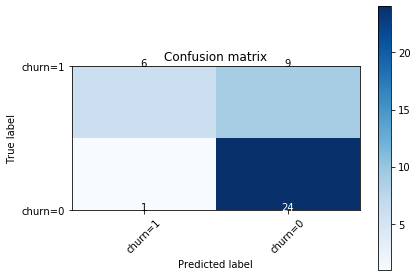

In [13]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

Посмотрите на первую строку. Первая строка предназначена для клиентов, чье фактическое значение оттока в тестовом наборе равно 1.
Как вы можете рассчитать, из 40 клиентов значение оттока 15 из них равно 1.
И из этих 15 классификатор правильно предсказал 6 из них как 1, а 9 из них как 0.

Это означает, что для 6 клиентов фактическое значение оттока было 1 в наборе тестов, и классификатор также правильно предсказал их как 1. Однако, хотя фактическая метка из 9 клиентов была 1, классификатор предсказал их как 0, что не очень хорошо. Мы можем рассматривать это как ошибку модели для первой строки.

А как насчет клиентов со значением оттока 0? Давайте посмотрим на вторую строку.
Похоже, что было 25 клиентов, чье значение оттока было равно 0.


Классификатор правильно предсказал 24 из них как 0, а один из них ошибочно как 1. Таким образом, он проделал хорошую работу по прогнозированию клиентов со значением оттока 0. Хорошая вещь о матрице путаницы состоит в том, что она показывает способность модели правильно прогнозировать или разделить классы. В конкретном случае двоичного классификатора, такого как этот пример, мы можем интерпретировать эти числа как число истинных положительных результатов, ложных положительных результатов, истинных отрицательных значений и ложных отрицательных значений.

In [14]:
print (classification_report(y_test, yhat))


              precision    recall  f1-score   support

           0       0.73      0.96      0.83        25
           1       0.86      0.40      0.55        15

   micro avg       0.75      0.75      0.75        40
   macro avg       0.79      0.68      0.69        40
weighted avg       0.78      0.75      0.72        40



Основываясь на подсчете каждого раздела, мы можем вычислить точность и отзыв каждой метки:


- __Precision__ - это мера точности при условии, что метка класса была предсказана. Определяется как: Precision = TP / (TP + FP)

- __Recall__ - отзыв, это истинно положительный показатель. Он определяется как: Recall = TP / (TP + FN)

    
Таким образом, мы можем рассчитать точность и отзыв каждого класса.

__F1 оценка:__
Теперь мы можем рассчитать оценку F1 для каждой метки на основе точности и отзыва этой метки.

Оценка F1 - это гармоническое среднее точности и отзыва, где оценка F1 достигает своего лучшего значения в 1 (идеальная точность и отзыв) и худшего в 0. Это хороший способ показать, что классификатор имеет хорошее значение для обоих отзыва и точности.


И, наконец, мы можем сказать, что средняя точность для этого классификатора является средним значением показателя F1 для обеих меток, что в нашем случае составляет 0,72.

### log loss
Теперь давайте попробуем __log loss__ для оценки. В логистической регрессии на выходе может быть вероятность оттока клиентов. Эта вероятность составляет от 0 до 1.
Log loss (Логарифмическая потеря) измеряет производительность классификатора, где прогнозируемый результат представляет собой значение вероятности между 0 и 1.


In [15]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6017092478101186

<h2 id="practice">Практика</h2>
Попробуйте снова построить модель логистической регрессии для того же набора данных, но на этот раз используйте разные значения __solver__ и __regularization__. Какое будет новое значение __logLoss__?

In [ ]:
# write your code here



Дважды щелкните __здесь__ чтобы увидеть решение.

<!-- Your answer is below:
    
LR2 = LogisticRegression(C=0.01, solver='sag').fit(X_train,y_train)
yhat_prob2 = LR2.predict_proba(X_test)
print ("LogLoss: : %.2f" % log_loss(y_test, yhat_prob2))

-->